<a href="https://colab.research.google.com/github/HosseinEyvazi/Supervised-Learning/blob/main/Linear_Regression_overFitting_(add_this_to_github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## regression metrics


*   MAE :
is not derivative

*   MSE : is derivative but is not interpratable
*   RMSE : to fix both above metrics issues


*   R2 : is between 0-1 . higher value is better



## Hyperparameter tuning
note : hyperparamter examples :
* degree of polynomial LINEAR regressoin (note : linearness is based on weights)
* K in KNN
* eps and minPts in DBSCAN ,...


### Methods :
*   Random Search : it maybe better than grid search (runtime , accuracy)

*   Grid search : it's very regular

### Advance methods :
*   Bayesian optimization
*   Hyper band
*   Reinforcement learning-based parameter tuning
*   ...



## Over fitting
### defination :
 an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

### How to find the optimal point without over or underfitting ?
note : in this example number of epochs is a hyperparamter \
while training loss is too large , it means underfitting \
while training loss is too small , high difference of training loss and  validation loss means overfitting
<div>
<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/img_6210aec599a86.svg" alt="Drawing" style="width: 500px;"/>
</div>

## How to solve overfitting :
* Regularization (L1 , L2 , L1+L2) : this penelize the model for high value W(s)
* Elastic Net Regularization
* Early stopping
* Data augmentation
* Weight Decay
* Max-norm Regularization
* Batch normalization
* ...
* ...

## Regression models :


*   Linear regression (or polynomial linear regresssion)

*   Ridge regression (a regression that is using ridge regularization)
* Bayesian regression
*   Lasso regression
* quantile regression

*   elastic net regression
* principal component regression \

and :
* Support vector regression
* decision tree regression
* random forest regression
* gradiant boosting regression
* Least angle regression
* ...

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer , load_iris
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression # importing linear regression from linear_model MODULE/SUB MODULE
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
data = load_breast_cancer().data
columns = load_breast_cancer().feature_names
df = pd.DataFrame(data , columns=columns)
df.sample(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
348,11.47,16.03,73.02,402.7,0.09076,0.05886,0.025870,0.023220,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.1531,0.11200,0.09823,0.06548,0.2851,0.08763
370,16.35,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.087730,0.2175,0.06218,...,19.38,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
334,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,...,13.35,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207
474,10.88,15.62,70.41,358.9,0.10070,0.10690,0.051150,0.015710,0.1861,0.06837,...,11.94,19.35,80.78,433.1,0.1332,0.38980,0.33650,0.07966,0.2581,0.10800
425,10.03,21.28,63.19,307.3,0.08117,0.03912,0.002470,0.005159,0.1630,0.06439,...,11.11,28.94,69.92,376.3,0.1126,0.07094,0.01235,0.02579,0.2349,0.08061
513,14.58,13.66,94.29,658.8,0.09832,0.08918,0.082220,0.043490,0.1739,0.05640,...,16.76,17.24,108.50,862.0,0.1223,0.19280,0.24920,0.09186,0.2626,0.07048
466,13.14,20.74,85.98,536.9,0.08675,0.10890,0.108500,0.035100,0.1562,0.06020,...,14.80,25.46,100.90,689.1,0.1351,0.35490,0.45040,0.11810,0.2563,0.08174


## set 'texture error' feature as target

In [3]:
y = df['texture error']
X = df.drop('texture error' , axis=1)
X , y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

null , duplication handling

In [4]:
X.isna().sum().sum()
# if number of null values is not zero we have to use some methods such as fillna , dropna

0

In [5]:
X.duplicated().sum()
# if number of duplicated values is not zero we have to use drop_duplicates method


0

## EDA

In [6]:
X.shape

(569, 29)

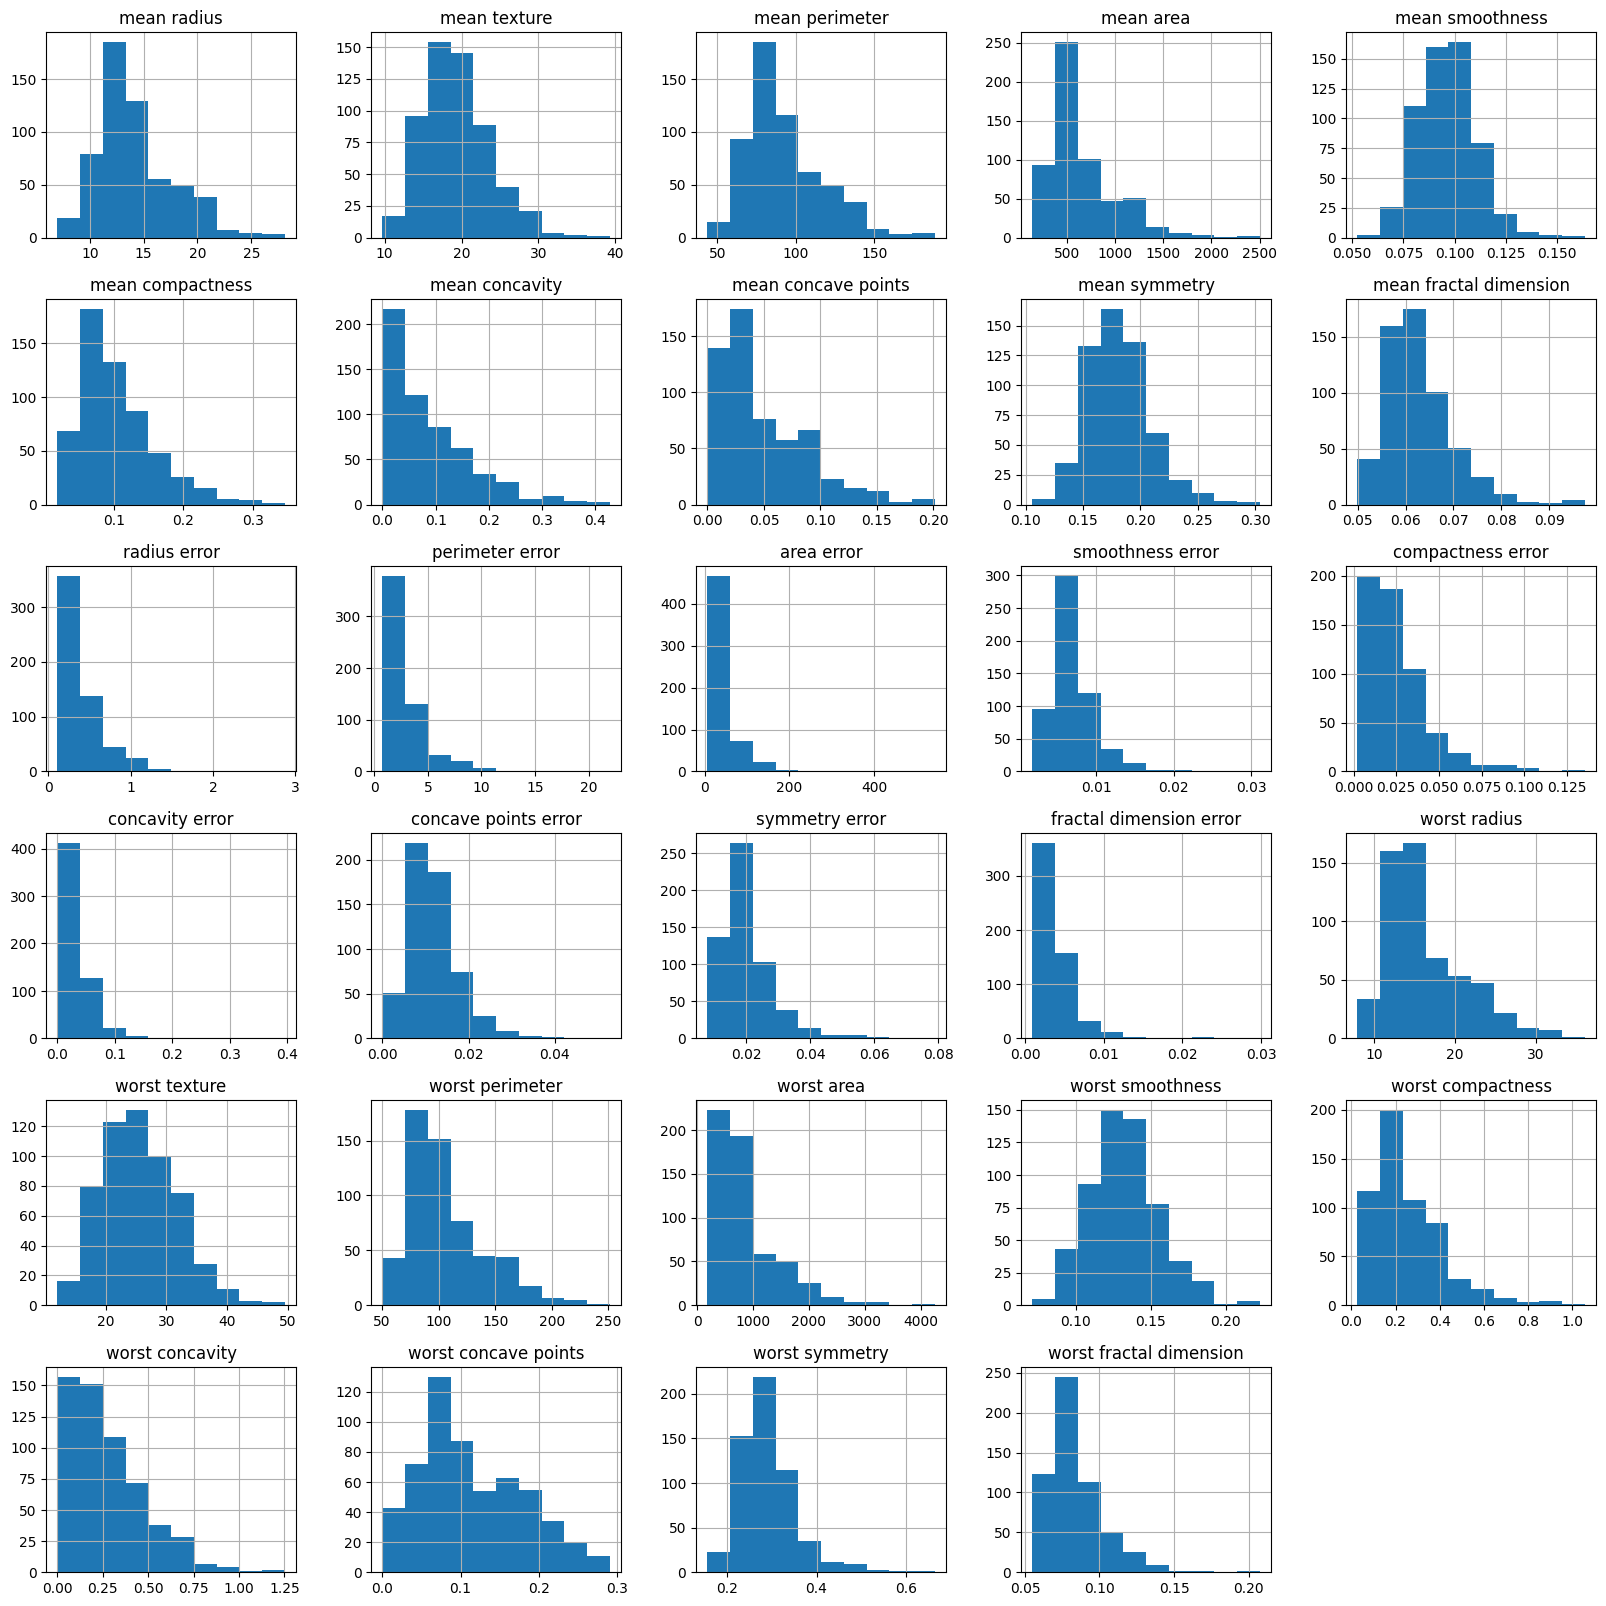

In [7]:
# plt.figure()
X.hist(figsize=(20,20)); # we use hist to show distribution of continous numeric variables
# plt.show()

## Skewness handling

### sclaing the dataset
note : look at the plots . all distributions are in range 0,1

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>],
       [<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>],
       [<Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>],
       [<Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
        <Axes: title={'center': 'symmetry error'}>,
        <Axes: title={'center': 'fractal dimensio

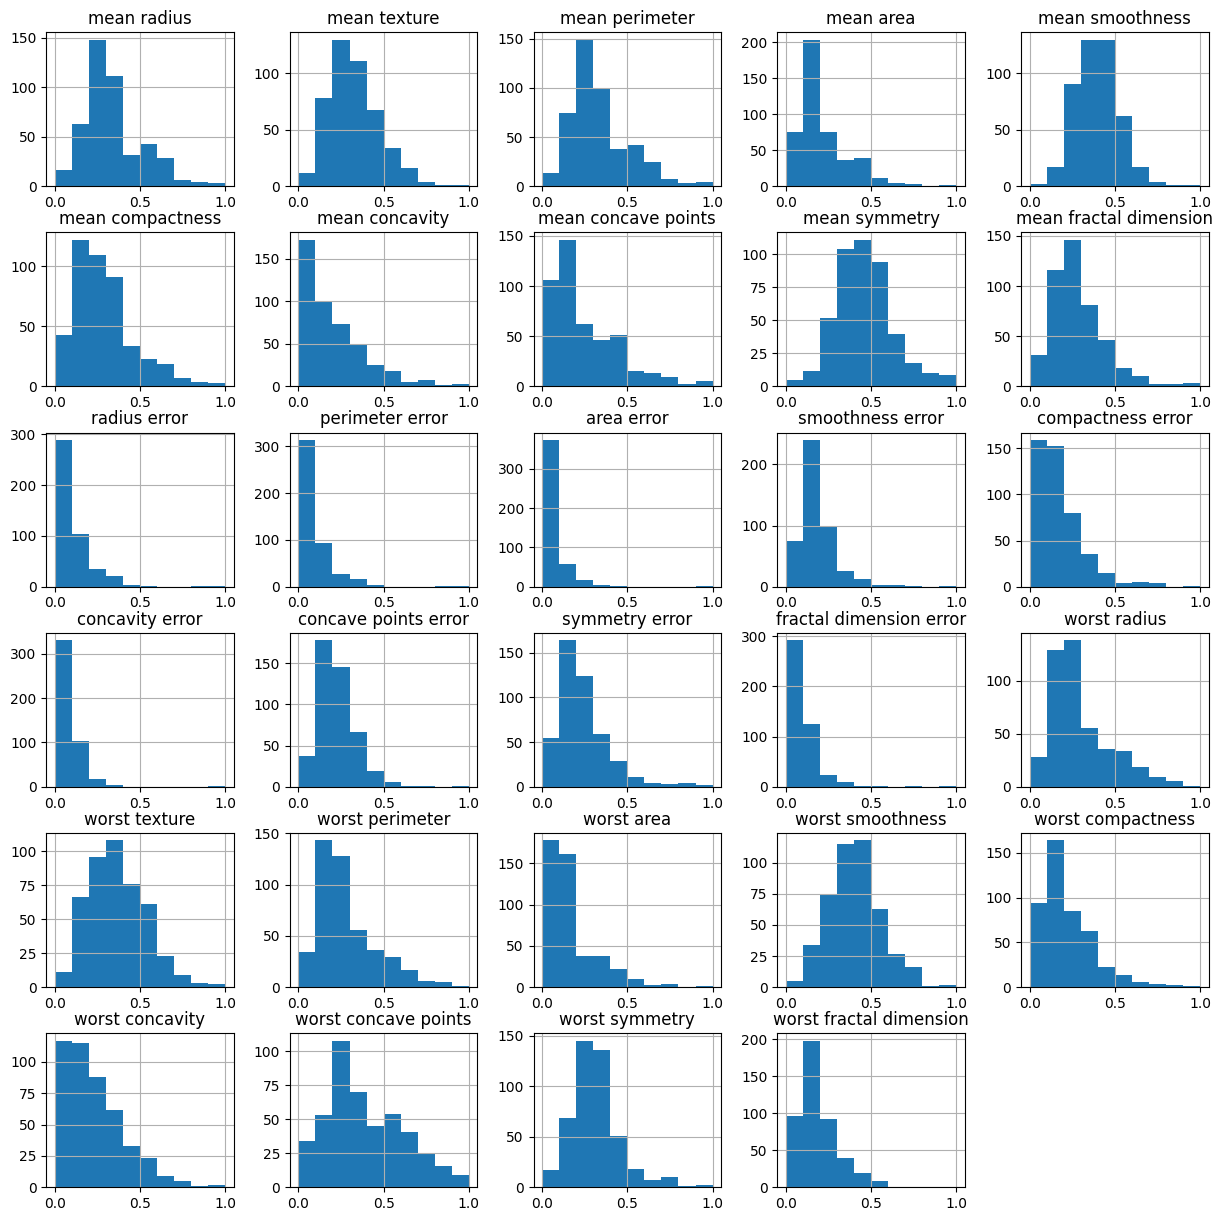

In [8]:
# train test split
X_train, X_test, y_train, y_test= train_test_split (X,y , test_size=.2)
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test =mms.transform(X_test)

#now look at this
pd.DataFrame(X_train , columns = X.columns).hist(figsize=(15,15))


## fitting the model

In [9]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred  = lr.predict(X_test)

## y test VS y pred

In [10]:
# y_te = pd.DataFrame(y_test , columns=['y_test'] )
y_pr = pd.DataFrame(y_pred ,columns=['y_pred'])
pd.concat([y_test.reset_index(drop=True) , y_pr] , axis=1) # why di we using reset_index() ? indices are not regular unlike the y_predict

,texture error,y_pred
0,0.6656,0.724395
1,0.9961,1.133270
2,0.8073,0.896242
3,1.7050,1.898221
4,0.4607,0.315968
...,...,...
109,0.6857,0.601695
110,0.8155,0.822530
111,0.8249,0.517334
112,1.4620,1.815244


### Evaluate the model

In [11]:
mean_squared_error(y_test , y_pred) , r2_score(y_test , y_pred)

(0.07380549010127604, 0.7026167646466135)

## convert Linear Regression to polynomial linear regression
note : polynomial regression has got a hyperparameter (features degree)

In [12]:
# these are created after spliting : X_train , X_test , y_train , y_test

poly = PolynomialFeatures(degree = 2)
X_train = poly.fit_transform(X_train) # = fit , transform
X_test = poly.transform(X_test)

# now we generated new features -> so these are should scale
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test =mms.transform(X_test)

# fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred  = lr.predict(X_test)

In [13]:
mean_squared_error(y_test , y_pred) , r2_score(y_test , y_pred)

(61.36835907325895, -246.2705098833639)

we r unable to run this model on higher than degree 2 because of RAM crashing

note : \
Data leakage is crucial in these scenarios. For example, when handling skewness, it's important to pay attention to this issue: first, fit on the training data, then transform the test data using the same fit. In some methods, such as applying a log transformation to handle skewness, fitting is not explicitly defined. Why, then, is it not important to fit PolynomialFeatures on the test data? This method simply transforms the features into higher dimensions. However, it's still advisable to be cautious, even if it doesn't seem critical.



### K neighbors regression


In [59]:
X = load_iris().data
df = pd.DataFrame(X ,columns = load_iris().feature_names)

X_train, X_test, y_train, y_test = train_test_split(df.drop('petal length (cm)', axis=1) , df['petal length (cm)'] , random_state=1)
####
# after EDA and preprocessing
####
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train , y_train )
y_pred = knn_reg.predict(X_test)

r2_score (y_test , y_pred)



#
# knn_reg.fit()

0.9722904296322752

### finding optimal number of neighbors using loops

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize an empty list to store scores
scores = []

# Loop over different values of n_neighbors
for i in range(1, 21):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'R2 score for n={i} is equal to: {r2}')
    scores.append((i, r2))  # Append a tuple (i, r2) to the list

# Find the best score and corresponding n_neighbors
best_score = max(scores, key=lambda x: x[1])  # Find the tuple with the maximum R2 score
best_n_neighbors = best_score[0]
best_r2 = best_score[1]

print('#' * 37, '#' * 37, sep='\n')
print(f'The best R2 score is {best_r2} for n_neighbors: {best_n_neighbors}')

R2 score for n=1 is equal to: 0.9615161391133532
R2 score for n=2 is equal to: 0.9674092593419349
R2 score for n=3 is equal to: 0.9722904296322752
R2 score for n=4 is equal to: 0.9749765614536363
R2 score for n=5 is equal to: 0.974827447653913
R2 score for n=6 is equal to: 0.9753312399859121
R2 score for n=7 is equal to: 0.9772274819120023
R2 score for n=8 is equal to: 0.9775548015536408
R2 score for n=9 is equal to: 0.9764914549205514
R2 score for n=10 is equal to: 0.9773302379570517
R2 score for n=11 is equal to: 0.9778081887510474
R2 score for n=12 is equal to: 0.9773787024222311
R2 score for n=13 is equal to: 0.9769748807995707
R2 score for n=14 is equal to: 0.9762029281555026
R2 score for n=15 is equal to: 0.975214766532236
R2 score for n=16 is equal to: 0.9753480205589535
R2 score for n=17 is equal to: 0.9738551106226783
R2 score for n=18 is equal to: 0.9747930215138573
R2 score for n=19 is equal to: 0.974822530536892
R2 score for n=20 is equal to: 0.9747292289834367
############

### finding optimal solution using [randomized search](https://chatgpt.com/share/67719fcc-f148-800f-a7d7-caa1393085e6)

note : this method is better choice for when number of hyperparamters are 2 or more

In [130]:

# Define the hyperparameter grid
param_distributions = {'n_neighbors': range(1, 21)}     # n_neighbors is knn regressor param itself . you have to pass param name itslef exactly

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_reg,
                                    param_distributions=param_distributions,
                                    n_iter=20,  # Number of parameter settings that are sampled
                                    scoring='r2',  # Use R2 score as the metric
                                    cv=5,  # Number of cross-validation folds
                                    verbose=1,
                                    random_state=612)

# Fit the RandomizedSearchCV on WHOLE data set (not training(this handles in this method itself))
random_search.fit(df.drop('petal length (cm)', axis=1) , df['petal length (cm)'])

# Get the best parameters and best score
best_n_neighbors = random_search.best_params_['n_neighbors']
best_r2 = random_search.best_score_

# Print the results
print(f'The best R2 score is {best_r2} for n_neighbors: {best_n_neighbors}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best R2 score is 0.5085023310121763 for n_neighbors: 6
